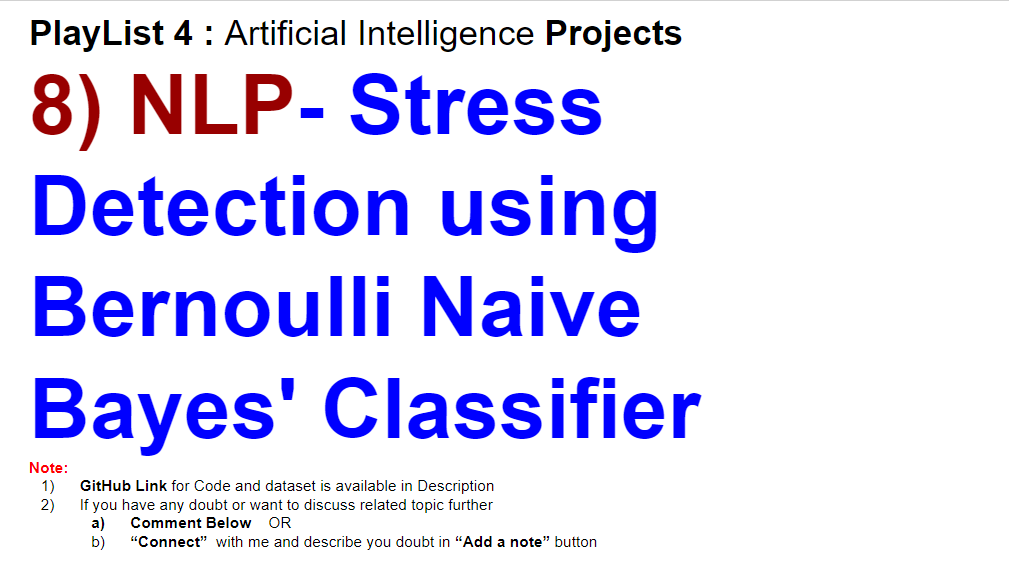

Stress, anxiety, and depression are threatening the mental health of people. 

People often share their feelings on social media platforms like
    
    on Instagram in the form of posts and stories, and 
    on Reddit in the form of asking for suggestions about their life on subreddits. 

In the past few years, many content creators have come forward to create content to help people with their mental health. 

Many organizations can use "stress detection" to find which social media users are stressed to help them quickly.

In [50]:
# there is 'stress.csv' dataset on Kaggle with 116 columns. 
    # But, We only need to use the "text" and "label" columns for this task.

The dataset I am using for this task contains data posted on subreddits related to mental health. 

This dataset contains various mental health problems shared by people about their life. 

Fortunately, this dataset is labelled as 0 and 1, where 0 indicates no stress and 1 indicates stress. 

In [51]:
import pandas as pd
data = pd.read_csv('stress.csv')
data
# input / in-dependent variable (x) = text
# output / dependent variable (x) = label

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.800000,1521614353,5,1.806818,...,1.0000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.000000,1527009817,4,9.429737,...,1.1250,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.800000,1535935605,2,7.769821,...,1.0000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.600000,1516429555,0,2.667798,...,1.0000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.800000,1539809005,24,7.554238,...,1.0000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]","* Her, a week ago: Precious, how are you? (I i...",1713,0,1.000000,1515187044,13,-1.369333,...,1.4000,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066
2834,ptsd,9p4ung,"[20, 25]",I don't have the ability to cope with it anymo...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370
2835,anxiety,9nam6l,"(5, 10)",In case this is the first time you're reading ...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455
2836,almosthomeless,5y53ya,"[5, 10]",Do you find this normal? They have a good rela...,1834,0,0.571429,1488938143,4,2.421912,...,1.1111,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722


In [52]:
# Let's check whether this dataset contains any null values or not:
data.isnull().sum()

# observation:
        # So this dataset does not have any null values.

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

#### Data - Cleaning

In [53]:
#  let’s prepare the text column of this dataset to clean the text column with 
        # stopwords, links, special symbols and language errors:
import nltk
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')

from nltk.corpus import stopwords
stopword = set(stopwords.words('english'))

import re
import string
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data['text'] = data['text'].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Kapil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### WordCloud
A word cloud is a data visualization technique 
    
    that shows the most used words in large font and the least used words in small font. 

It helps to get an idea about your text data, 
    
    especially when working on problems based on natural language processing

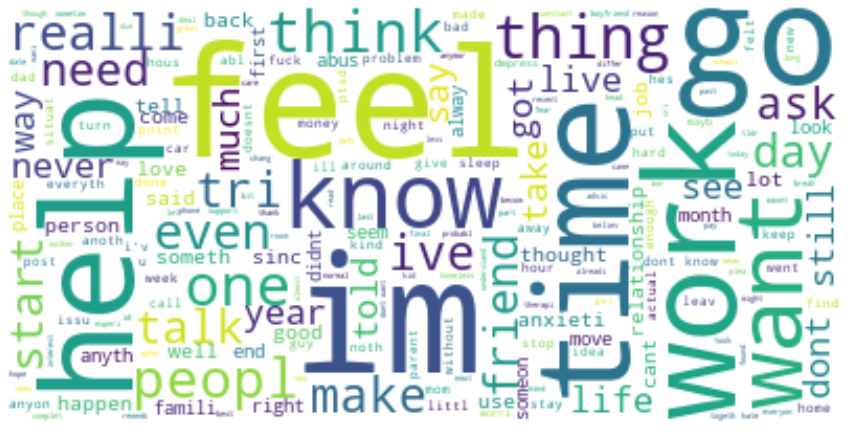

In [54]:
# let’s have a look at the most used words by the people sharing about their life problems on social media 
    # by visualizing a word cloud of the text column:

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords,
                     background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Stress Detection Model

In [55]:
# The label column in this dataset contains labels as 0 and 1. 
        # 0 means no stress, and 1 means stress. 

# So let’s prepare this column accordingly and select the text and label columns
        # for the process of training a machine learning model:
    
data = data[['text','label']]
data

,text,label
0,said felt way sugget go rest trigger ahead you...,1
1,hey rassist sure right place post goe im curr...,0
2,mom hit newspap shock would know dont like pla...,1
3,met new boyfriend amaz kind sweet good student...,1
4,octob domest violenc awar month domest violenc...,1
...,...,...
2833,week ago precious ignor jan happi year prec...,0
2834,dont abil cope anymor im tri lot thing trigger...,1
2835,case first time your read post look peopl will...,0
2836,find normal good relationship main problem see...,0


In [56]:
# Instead, Let's use 'Stress' and 'No stress' labels instead of 1 and 0. 
    
data['label'] = data['label'].map({0: 'No Stress',
                                   1: 'Stress'})
data = data[['text','label']]
data

C:\Users\Kapil\AppData\Local\Temp/ipykernel_10656/1299549283.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({0: 'No Stress',


,text,label
0,said felt way sugget go rest trigger ahead you...,Stress
1,hey rassist sure right place post goe im curr...,No Stress
2,mom hit newspap shock would know dont like pla...,Stress
3,met new boyfriend amaz kind sweet good student...,Stress
4,octob domest violenc awar month domest violenc...,Stress
...,...,...
2833,week ago precious ignor jan happi year prec...,No Stress
2834,dont abil cope anymor im tri lot thing trigger...,Stress
2835,case first time your read post look peopl will...,No Stress
2836,find normal good relationship main problem see...,No Stress


In [57]:
# Let's split this dataset into training and test sets:
from sklearn.model_selection import train_test_split

# splitting In-dependent (x) and dependent (y) variables
import numpy as np
x = np.array(data['text'])
y = np.array(data['label'])

# CountVectorizer
# CountVectorizer tokenizes(tokenization means breaking down a sentence or paragraph or any text into words) the text
    # along with performing very basic preprocessing like 
            # removing the punctuation marks, 
            # converting all the words to lowercase, etc.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(X,y,
                                               test_size=0.33,
                                               random_state=42)

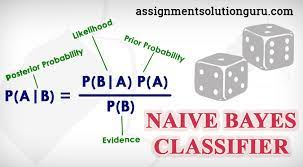

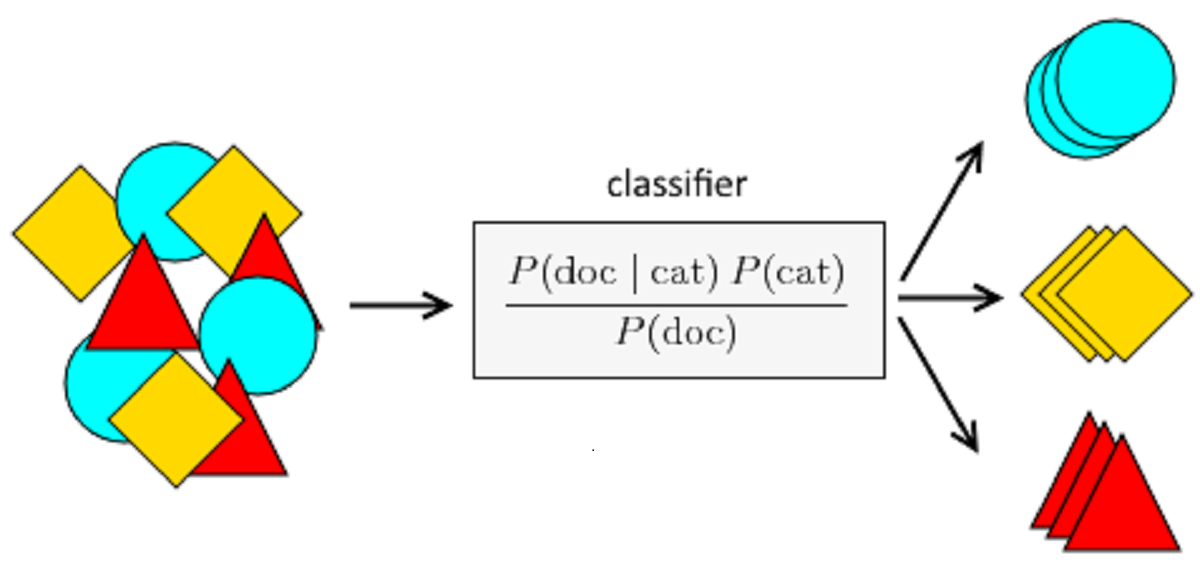

In [58]:
# As this task is based on the problem of binary classification, 
    #Let's the Bernoulli Naive Bayes algorithm, 
            #which is one of the best algorithms for binary classification problems.
# let’s train the stress detection model:

from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()
model.fit(xtrain,ytrain)

BernoulliNB()

In [59]:
df2 = pd.DataFrame(model.predict(xtest))
df2

,0
0,No Stress
1,No Stress
2,Stress
3,Stress
4,No Stress
...,...
932,Stress
933,Stress
934,No Stress
935,No Stress


In [63]:
horizontal_concat = pd.concat([pd.DataFrame(ytest), pd.DataFrame(model.predict(xtest))], axis=1)
horizontal_concat

,0,0
0,No Stress,No Stress
1,No Stress,No Stress
2,Stress,Stress
3,Stress,Stress
4,No Stress,No Stress
...,...,...
932,Stress,Stress
933,No Stress,Stress
934,Stress,No Stress
935,No Stress,No Stress


In [64]:
# let’s test the performance of our "stress detection model" on some random sentences based on mental health:
user = input('Enter a Text: ')
data = cv.transform([user]).toarray()
output = model.predict(data)
output

# People need to take care of their mental health

Enter a Text: People need to take care of their mental health


array(['No Stress'], dtype='<U9')

In [65]:
user = input('Enter a Text: ')
data = cv.transform([user]).toarray()
output = model.predict(data)
output

# Sometime I feel like I need some help

Enter a Text: Sometime I feel like I need some help


array(['Stress'], dtype='<U9')